
Sample Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Cleaned Messages:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in  a wkly comp to win fa cup final...  
3        u dun say so early hor u c already then say  
4

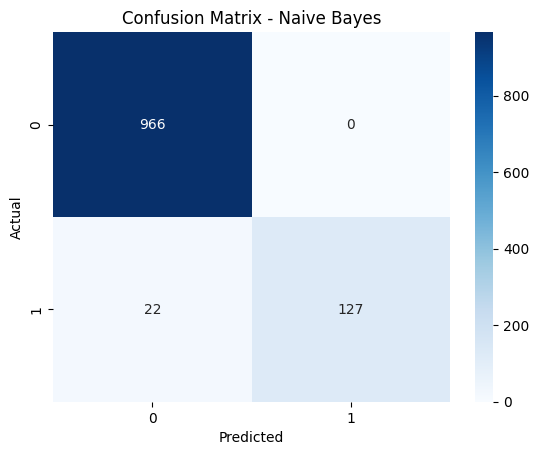


Model: Logistic Regression
Accuracy: 0.9650224215246637
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



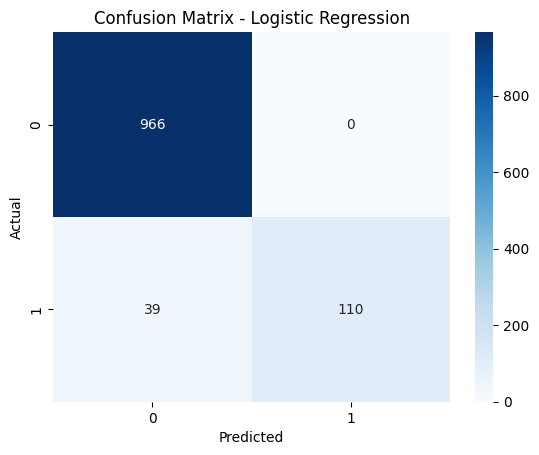


Custom Email: Congratulations! You won a free ticket. Claim now by sending your details!
Naive Bayes Prediction (1=Spam, 0=Ham): 1
Logistic Regression Prediction (1=Spam, 0=Ham): 1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print("\nSample Data:")
print(data.head())

data['label_num'] = data['label'].map({'ham':0, 'spam':1})

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['clean_message'] = data['message'].apply(clean_text)

print("\nCleaned Messages:")
print(data[['message','clean_message']].head())

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(data['clean_message'])
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

custom_email = ["Congratulations! You won a free ticket. Claim now by sending your details!"]
custom_email_clean = [clean_text(custom_email[0])]
custom_email_vec = vectorizer.transform(custom_email_clean)

print("\nCustom Email:", custom_email[0])
print("Naive Bayes Prediction (1=Spam, 0=Ham):", nb_model.predict(custom_email_vec)[0])
print("Logistic Regression Prediction (1=Spam, 0=Ham):", lr_model.predict(custom_email_vec)[0])
